# Linear Regression Model

#### Summary: This notebook will take our clean and engineered dataset and split, train, test, and then send a copy of the coefficents of the regression to the processed data folder.

#### 0. Split
#### 1. Normalize
#### 2. Train
#### 3. Predict
#### 4. Analyze

### Imports

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
os.getcwd()

'/Users/sophiacolonello/Desktop/school/junior year/second semester/data3000-adv-ds/chatgpt-influencer/notebooks'

In [3]:
os.chdir(path="/Users/sophiacolonello/Desktop/school/junior year/second semester/data3000-adv-ds/chatgpt-influencer/data/processed")
data = pd.read_csv("chatgpt_data_final.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,Name,Age,Years_Active,Beauty_Level,Award_Wins,Media_Mentions,Social_Media_Followers,Social_Media_Likes,...,Health,Beauty,Tech,Bachelor's,Culinary School,High School Diploma,Master's,Self-Taught,Introvert,Extrovert
0,0,0,Ava Johnson,32,7,8,3.0,500.0,1000000.0,50000.0,...,1,0,0,1,0,0,0,0,0,1
1,1,1,Jackson Lee,28,5,7,2.0,300.0,800000.0,40000.0,...,1,0,0,0,0,1,0,0,1,0
2,2,2,Sophie Garcia,35,8,9,5.0,600.0,1200000.0,70000.0,...,0,1,0,0,0,0,1,0,1,0
3,3,3,Ryan Patel,30,6,6,3.0,400.0,900000.0,45000.0,...,0,0,0,0,1,0,0,0,0,1
4,4,4,Emma Chen,25,4,7,2.0,250.0,600000.0,35000.0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
data.shape

(607, 35)

### 0. Split

In [5]:
# Concentrate Features and Labels

ew = ['Unnamed: 0.1', 'Unnamed: 0','Name','Income_Per_Year', 'First_Name','Last_Name']
target = data['Income_Per_Year']
features = data.drop(ew, axis=1)

In [6]:
features.head()

,Age,Years_Active,Beauty_Level,Award_Wins,Media_Mentions,Social_Media_Followers,Social_Media_Likes,Network_Size,Female,Male,...,Health,Beauty,Tech,Bachelor's,Culinary School,High School Diploma,Master's,Self-Taught,Introvert,Extrovert
0,32,7,8,3.0,500.0,1000000.0,50000.0,5.0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,28,5,7,2.0,300.0,800000.0,40000.0,4.0,0,1,...,1,0,0,0,0,1,0,0,1,0
2,35,8,9,5.0,600.0,1200000.0,70000.0,6.0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,30,6,6,3.0,400.0,900000.0,45000.0,5.0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,25,4,7,2.0,250.0,600000.0,35000.0,4.0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
features.columns

Index(['Age', 'Years_Active', 'Beauty_Level', 'Award_Wins', 'Media_Mentions',
       'Social_Media_Followers', 'Social_Media_Likes', 'Network_Size',
       'Female', 'Male', 'European', 'Asian', 'Middle_Eastern',
       'North_American', 'South_American', 'Oceanic', 'Entertainment', 'Food',
       'Travel', 'Health', 'Beauty', 'Tech', 'Bachelor's', 'Culinary School',
       'High School Diploma', 'Master's', 'Self-Taught', 'Introvert',
       'Extrovert'],
      dtype='object')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=104, test_size=0.30)

### 1. Normalize

In [8]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train.head()

,Age,Years_Active,Beauty_Level,Award_Wins,Media_Mentions,Social_Media_Followers,Social_Media_Likes,Network_Size,Female,Male,...,Health,Beauty,Tech,Bachelor's,Culinary School,High School Diploma,Master's,Self-Taught,Introvert,Extrovert
0,0.750000,0.428571,0.333333,0.50,0.5,0.500000,0.454545,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.333333,0.285714,0.333333,0.50,0.5,0.500000,0.454545,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.083333,0.000000,1.000000,0.25,0.3,0.277778,0.272727,0.333333,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.250000,0.428571,0.666667,0.25,0.4,0.444444,0.363636,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.250000,0.285714,0.666667,0.50,0.5,0.500000,0.454545,0.333333,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
X_train = np.array(X_train)
y_train = np.array(y_train)

### 2. Train

In [10]:
model = LinearRegression().fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.8749035843117501


### 3. Predict

In [11]:
scaler = MinMaxScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [12]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [13]:
predictions = model.predict(X_test)
r2 = r2_score(predictions, y_test)
print(r2)

0.2871174579545098


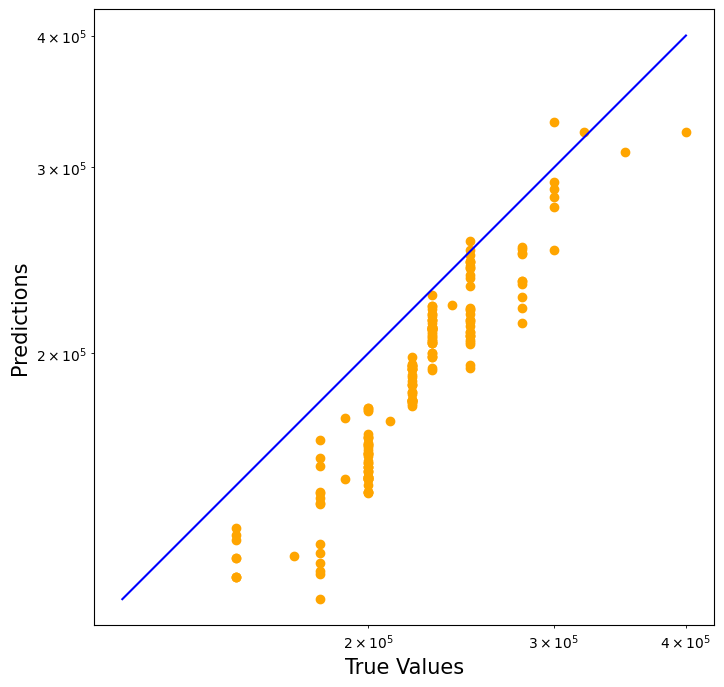

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, c='orange')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

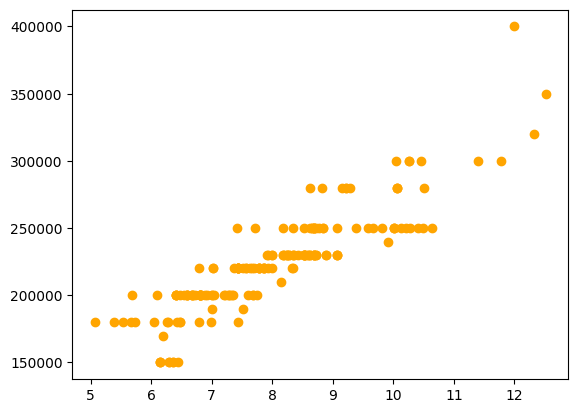

In [15]:
X_condense = [np.sum(num_list) for num_list in X_test] 
plt.scatter(X_condense, y_test, c='orange')

### 4. Analyze

In [16]:
print(model.intercept_)
list(zip(features, model.coef_))
data = pd.DataFrame(list(zip(features, model.coef_)))

105521.45460812005


In [17]:
print(mean_absolute_error(y_test, predictions))

31602.125847575087


In [15]:
y_test.mean()

223934.4262295082

In [18]:
os.chdir(path = "/Users/sophiacolonello/Desktop/school/junior year/second semester/data3000-adv-ds/chatgpt-influencer")
data.to_csv("data/processed/coefficents.csv")

### Please see data_analysis for next step.